In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [7]:
# 1. Tworzymy dane: x od 0 do 99, y = 2x + 1
x_train = torch.arange(0, 100, dtype=torch.float64).reshape(-1, 1)  # shape (100, 1)
y_train = 2 * x_train + 1

In [8]:
# 2. Definiujemy prosty model liniowy
model = nn.Linear(in_features=1, out_features=1).double()

In [9]:
# 3. Ustawiamy funkcję straty i optymalizator
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [10]:
# 4. Trening modelu przez 1000 epok
for epoch in range(1000):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoka {epoch} | Strata: {loss.item():.4f}")

Epoka 0 | Strata: 27353.6498
Epoka 100 | Strata: 0.0573
Epoka 200 | Strata: 0.0568
Epoka 300 | Strata: 0.0562
Epoka 400 | Strata: 0.0556
Epoka 500 | Strata: 0.0550
Epoka 600 | Strata: 0.0545
Epoka 700 | Strata: 0.0539
Epoka 800 | Strata: 0.0534
Epoka 900 | Strata: 0.0529


In [13]:
# 5. Sprawdźmy wyniki na kilku przykładowych danych
x_test = torch.tensor([[150.0], [200.0], [250.0]], dtype=torch.float64)
y_test_pred = model(x_test)

print("\nTestowe predykcje:")
for i in range(x_test.shape[0]):
    print(f"x = {x_test[i].item():.1f} → y = {y_test_pred[i].item():.2f}")


Testowe predykcje:
x = 150.0 → y = 301.57
x = 200.0 → y = 401.92
x = 250.0 → y = 502.26


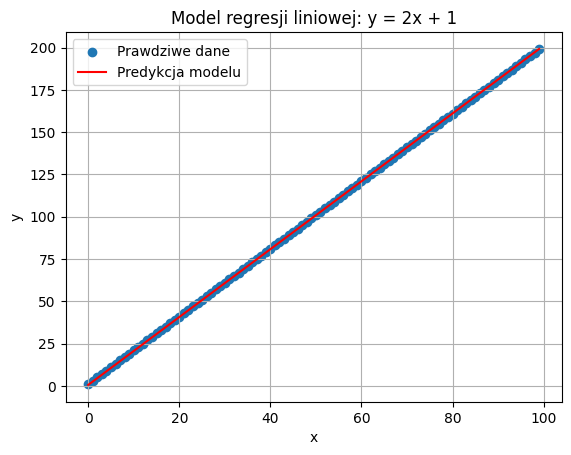

In [14]:
# 6. Opcjonalnie: wykres
with torch.no_grad():
    plt.scatter(x_train.numpy(), y_train.numpy(), label="Prawdziwe dane")
    plt.plot(x_train.numpy(), model(x_train).numpy(), color='red', label="Predykcja modelu")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Model regresji liniowej: y = 2x + 1")
    plt.grid(True)
    plt.show()